# Imports

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

# First program

## Parsing files

In [36]:
bbs = {}

#Reading basic block data
with open("../../dataset/bb_data/reverse_nums_features.txt") as fIn:
    for line in tqdm.tqdm(fIn, desc='Read file'):
        #line start with "@" symbols the begging of a new basic block
        if line[0] == "@":
            bb_name = line.split()[-1].rstrip(":")
            bbs[bb_name] = []
        else:
            bbs[bb_name].append(line.split("=")[0].rstrip())

Read file: 18956it [00:00, 1404324.34it/s]


In [77]:
bbs_energy = {}

#Reading basic block data
with open("../../dataset/bb_data/reverse_nums_labels.txt") as fIn:
    for line in tqdm.tqdm(fIn, desc='Read file'):
        #line start with "@" symbols the begging of a new basic block
        line = line.split(":")
        bb_name = line[0].split()[-1]
        bbs_energy[bb_name] = float(line[-1].strip())

Read file: 3168it [00:00, 792293.55it/s]


In [105]:
bbs_df = pd.DataFrame({"bb_name": bbs.keys(), "bb": bbs.values()})
bbs_energy_df = pd.DataFrame({"bb_name": bbs_energy.keys(), "energy": bbs_energy.values()})

df = bbs_df.merge(bbs_energy_df, on="bb_name", how="inner")
print(f"Number of basic blocks with energies for reverse_nums program: {len(df)}")

Number of basic blocks with energies for reverse_nums program: 3168


In [79]:
df.head(5)

,bb_name,bb,energy
0,1_0,"[movl $0x0, -0x40(%rbp), movl %ebx, -0x3c(%r...",0.723267
1,2_0,"[callq 0xffffffffffffffc8, pushq %rbp, mov %...",0.783539
2,3_0,"[popq %rbp, retq]",0.361634
3,4_0,"[movq $0x0, -0x28(%rbp)]",0.173120
4,5_0,"[mov $0x4b3004, %rdi, mov $0x0, %al, callq 0x...",1.644629


## Analysis

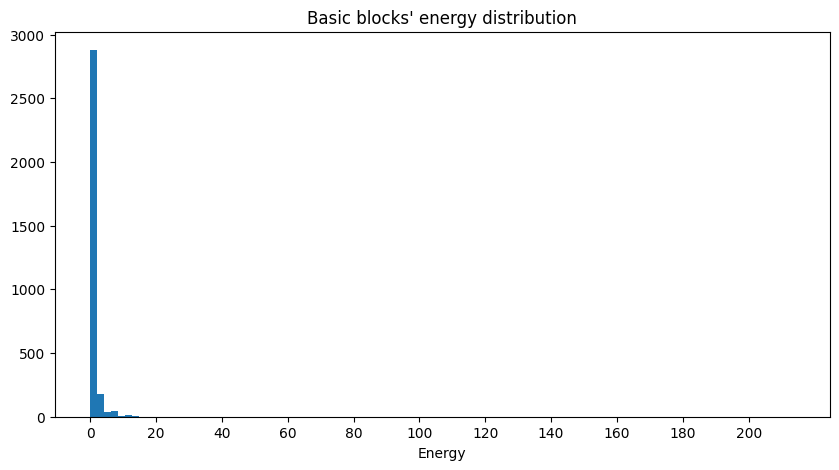

In [102]:
x_ticks = np.arange(df.energy.min(), df.energy.max(), 20)

plt.figure(figsize=(10, 5))
plt.hist(df.energy, bins=100)
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.xticks(x_ticks)
plt.show()

We have one outlier which we throw away

In [103]:
outlier_bb = df.loc[df.energy.idxmax()]
outlier_bb.bb

['movq  -0x20(%rbp), %rax',
 'cqo',
 'mov $0xa, %ecx',
 'idiv %rcx',
 'movq  %rdx, -0x30(%rbp)',
 'imulq  $0xa, -0x28(%rbp), %rax',
 'addq  -0x30(%rbp), %rax',
 'movq  %rax, -0x28(%rbp)',
 'movq  -0x20(%rbp), %rax',
 'cqo',
 'idiv %rcx',
 'movq  %rax, -0x20(%rbp)',
 'jmp 0xffffffffffffffc0']

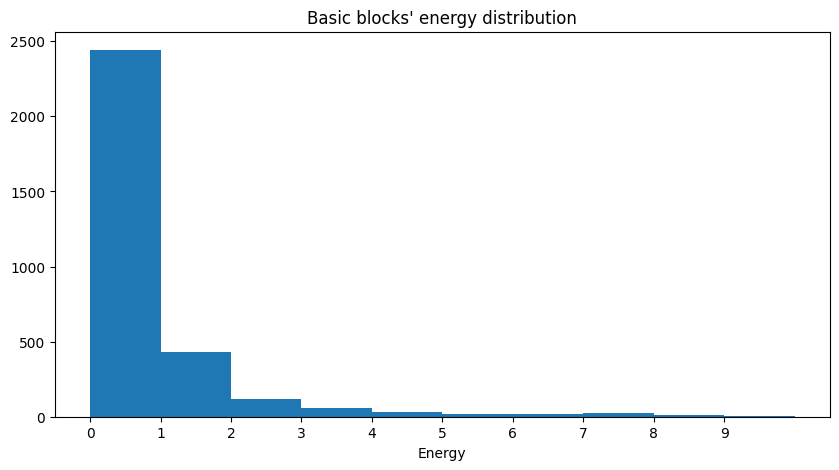

In [104]:
x_ticks = np.arange(df.energy.min(), 10, 1)

plt.figure(figsize=(10, 5))
plt.hist(df.energy, range=(0,10))
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.xticks(x_ticks)
plt.show()

In [107]:
print(f"Number of basic blocks with 0 energy: {len(df[df.energy == 0.0])}")

Number of basic blocks with 0 energy: 1051


In [132]:
df[df.bb.map(tuple) == ('add $0x18, %rsp',
 'mov %r13, %rax',
 'popq  %rbx',
 'popq  %rbp',
 'popq  %r12',
 'popq  %r13',
 'popq  %r14',
 'popq  %r15',
 'retq')]

,bb_name,bb,energy
365,5_361,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",0.779035
941,43_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",0.121676
1173,50_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",4.882667
1405,57_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",1.642742
1637,64_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",4.521798
1869,71_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",0.949294
2101,78_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",0.949294
2333,85_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",0.000000
2565,92_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",0.000000
2797,99_213,"[add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...",0.000000


In [128]:
grouped_df = df.groupby(df["bb"].map(tuple))["energy"].apply(list).reset_index()
grouped_df

,bb,energy
0,(),[0.0]
1,"(add $0x18, %rsp, mov %r13, %rax, popq %rbx, ...","[0.7790346587751376, 0.12167584340201128, 4.88..."
2,"(add $0x1d0, %rsp, popq %rbp, popq %r12, pop...",[0.4760761214271957]
3,"(add $0x38, %rsp, mov %r12d, %eax, popq %rbx,...",[0.0]
4,"(add $0x38, %rsp, mov %r14d, %eax, popq %rbx,...",[0.0]
...,...,...
446,"(xor %ecx, %ecx, movl -0x510(%rbp), %edx, cmp...","[0.3325794588095518, 13.345957245528046, 4.490..."
447,"(xor %edx, %edx, xor %esi, %esi, mov %rbx, %rd...",[0.0]
448,"(xor %esi, %esi, mov %r13, %rdi, callq 0xffff...",[1.471511631594347]
449,"(xor %r12d, %r12d, nop, movl %fs:0x18, %eax, ...",[0.0]


In [140]:
multiple_energies = grouped_df[grouped_df.energy.map(len) > 1]
print(f"Number of basic blocks that appear multiple times: {len(multiple_energies)}")

Number of basic blocks that appear multiple times: 172


In [147]:
zero_energy = multiple_energies[multiple_energies.energy.map(max) == 0]
print(f"Number of basic blocks that appear multiple times with 0 energy: {len(zero_energy)}")

Number of basic blocks that appear multiple times with 0 energy: 12


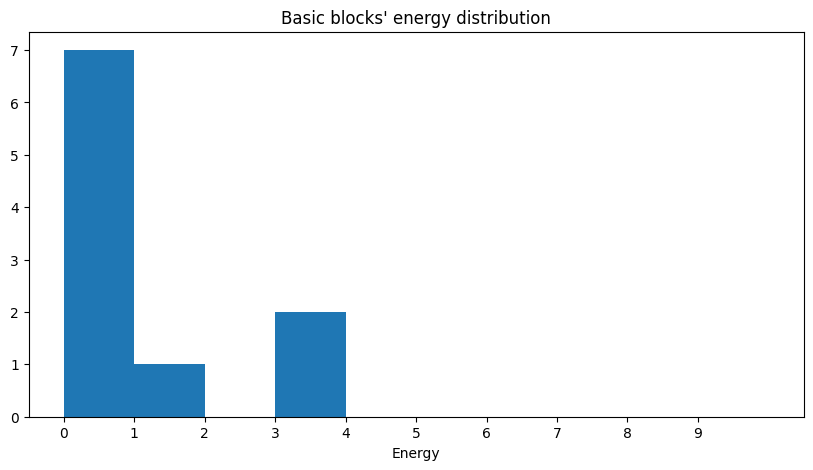

In [152]:
x_ticks = np.arange(0, 10, 1)

plt.figure(figsize=(10, 5))
plt.hist(multiple_energies.sample(1).energy, range=(0,10))
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.xticks(x_ticks)
plt.show()

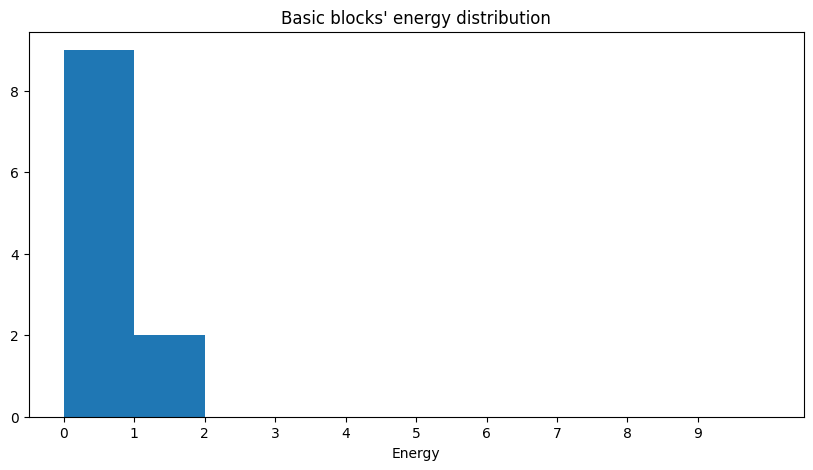

In [157]:
x_ticks = np.arange(0, 10, 1)

plt.figure(figsize=(10, 5))
plt.hist(multiple_energies.sample(1).energy, range=(0,10))
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.xticks(x_ticks)
plt.show()